Outgoing damage formula:

$$ \large \begin{align*}
    \mathrm{DMG_{out}} = \left[ \mathrm{ATK_{base}} \times \left( 1 + \mathrm{ATK_{bonus}^{\%}} \right) + \mathrm{ATK_{flat}} \right]
                         \times \left( 1 + \mathrm{DMG_{bonus}^{\%}} \right) \times \left( 1 + \mathrm{Rate_{crit}^{\%}} \times \mathrm{DMG_{crit}^{\%}} \right) && (1) \\
\end{align*} $$

Artifact score measured in number of substat rolls (main stats correspond to 10 substat rolls):

$$ \large \begin{align*}
    \mathrm{Score_{art}} = \frac{\mathrm{ATK_{bonus}^{\%}} - \mathrm{\widetilde{ATK}_{bonus}^{\%}}}{0.0466}
                         + \frac{\mathrm{DMG_{bonus}^{\%}} - \mathrm{\widetilde{DMG}_{bonus}^{\%}}}{0.0466}
                         + \frac{\mathrm{Rate_{crit}^{\%}} - \mathrm{\widetilde{Rate}_{crit}^{\%}}}{0.0311}
                         + \frac{\mathrm{DMG_{crit}^{\%}} - \mathrm{\widetilde{DMG}_{crit}^{\%}}}{0.0622}
                         = \frac{\mathrm{ATK_{bonus}^{\%}}}{0.0466} + \frac{\mathrm{DMG_{bonus}^{\%}}}{0.0466}
                         + \frac{\mathrm{Rate_{crit}^{\%}}}{0.0311} + \frac{\mathrm{DMG_{crit}^{\%}}}{0.0622} - \mathrm{Score_{other}} && (2) \\
\end{align*} $$

Lagrange multiplier:

$$ \large \begin{align*}
    \begin{cases}
        \frac{\partial \mathrm{DMG_{out}}}{\partial \mathrm{ATK_{bonus}^{\%}}} = \lambda \frac{\partial \mathrm{Score_{art}}}{\partial \mathrm{ATK_{bonus}^{\%}}} \\ \\
        \frac{\partial \mathrm{DMG_{out}}}{\partial \mathrm{DMG_{bonus}^{\%}}} = \lambda \frac{\partial \mathrm{Score_{art}}}{\partial \mathrm{DMG_{bonus}^{\%}}} \\ \\
        \frac{\partial \mathrm{DMG_{out}}}{\partial \mathrm{DMG_{crit}^{\%}}} = \lambda \frac{\partial \mathrm{Score_{art}}}{\partial \mathrm{DMG_{crit}^{\%}}} \\ \\
        \frac{\partial \mathrm{DMG_{out}}}{\partial \mathrm{Rate_{crit}^{\%}}} = \lambda \frac{\partial \mathrm{Score_{art}}}{\partial \mathrm{Rate_{crit}^{\%}}} \\ \\
    \end{cases}
    \implies
    \begin{cases}
        \mathrm{ATK_{base}} \times \left( 1 + \mathrm{DMG_{bonus}^{\%}} \right) \times \left( 1 + \mathrm{Rate_{crit}^{\%}} \times \mathrm{DMG_{crit}^{\%}} \right) = \frac{\lambda}{0.0466} && (3) \\ \\
        \left[ \mathrm{ATK_{base}} \times \left( 1 + \mathrm{ATK_{bonus}^{\%}} \right) + \mathrm{ATK_{flat}} \right] \times \left( 1 + \mathrm{Rate_{crit}^{\%}} \times \mathrm{DMG_{crit}^{\%}} \right) = \frac{\lambda}{0.0466} && (4) \\ \\
        \left[ \mathrm{ATK_{base}} \times \left( 1 + \mathrm{ATK_{bonus}^{\%}} \right) + \mathrm{ATK_{flat}} \right] \times \left( 1 + \mathrm{DMG_{bonus}^{\%}} \right) \times \mathrm{Rate_{crit}^{\%}} = \frac{\lambda}{0.0622} && (5) \\ \\
        \left[ \mathrm{ATK_{base}} \times \left( 1 + \mathrm{ATK_{bonus}^{\%}} \right) + \mathrm{ATK_{flat}} \right] \times \left( 1 + \mathrm{DMG_{bonus}^{\%}} \right) \times \mathrm{DMG_{crit}^{\%}} = \frac{\lambda}{0.0311} && (6) \\ \\
    \end{cases} \\
\end{align*} $$

From (3) and (4):

$$ \large \begin{align*}
    \mathrm{ATK_{bonus}^{\%}} = \mathrm{DMG_{bonus}^{\%}} - \frac{\mathrm{ATK_{flat}}}{\mathrm{ATK_{base}}} && (7) \\
\end{align*} $$

From (4) and (5):

$$ \large \begin{align*}
    \mathrm{DMG_{bonus}^{\%}} = \frac{3}{4} \left(\mathrm{DMG_{crit}^{\%}} + \frac{1}{\mathrm{Rate_{crit}^{\%}}} \right) - 1 && (8) \\
\end{align*} $$

From (5) and (6):

$$ \large \begin{align*}
    \mathrm{DMG_{crit}^{\%}} = 2 \mathrm{Rate_{crit}^{\%}} && (9) \\
\end{align*} $$

[p0]
dmg_crit = 0.5
rate_crit = 0.25
dmg_bonus = 2.375
dmg_out = 12.814453125
score = 118.00850089010943

[p1]
dmg_crit = 1.0
rate_crit = 0.5
dmg_bonus = 1.25
dmg_out = 7.59375
score = 85.80240950554077

[p2]
dmg_crit = 1.4142135623730951
rate_crit = 0.7071067811865476
dmg_bonus = 1.1213203435596424
dmg_out = 8.999999999999998
score = 93.59844153291749

[p3]
dmg_crit = 2.0
rate_crit = 1.0
dmg_bonus = 1.25
dmg_out = 15.1875
score = 117.95675034155363



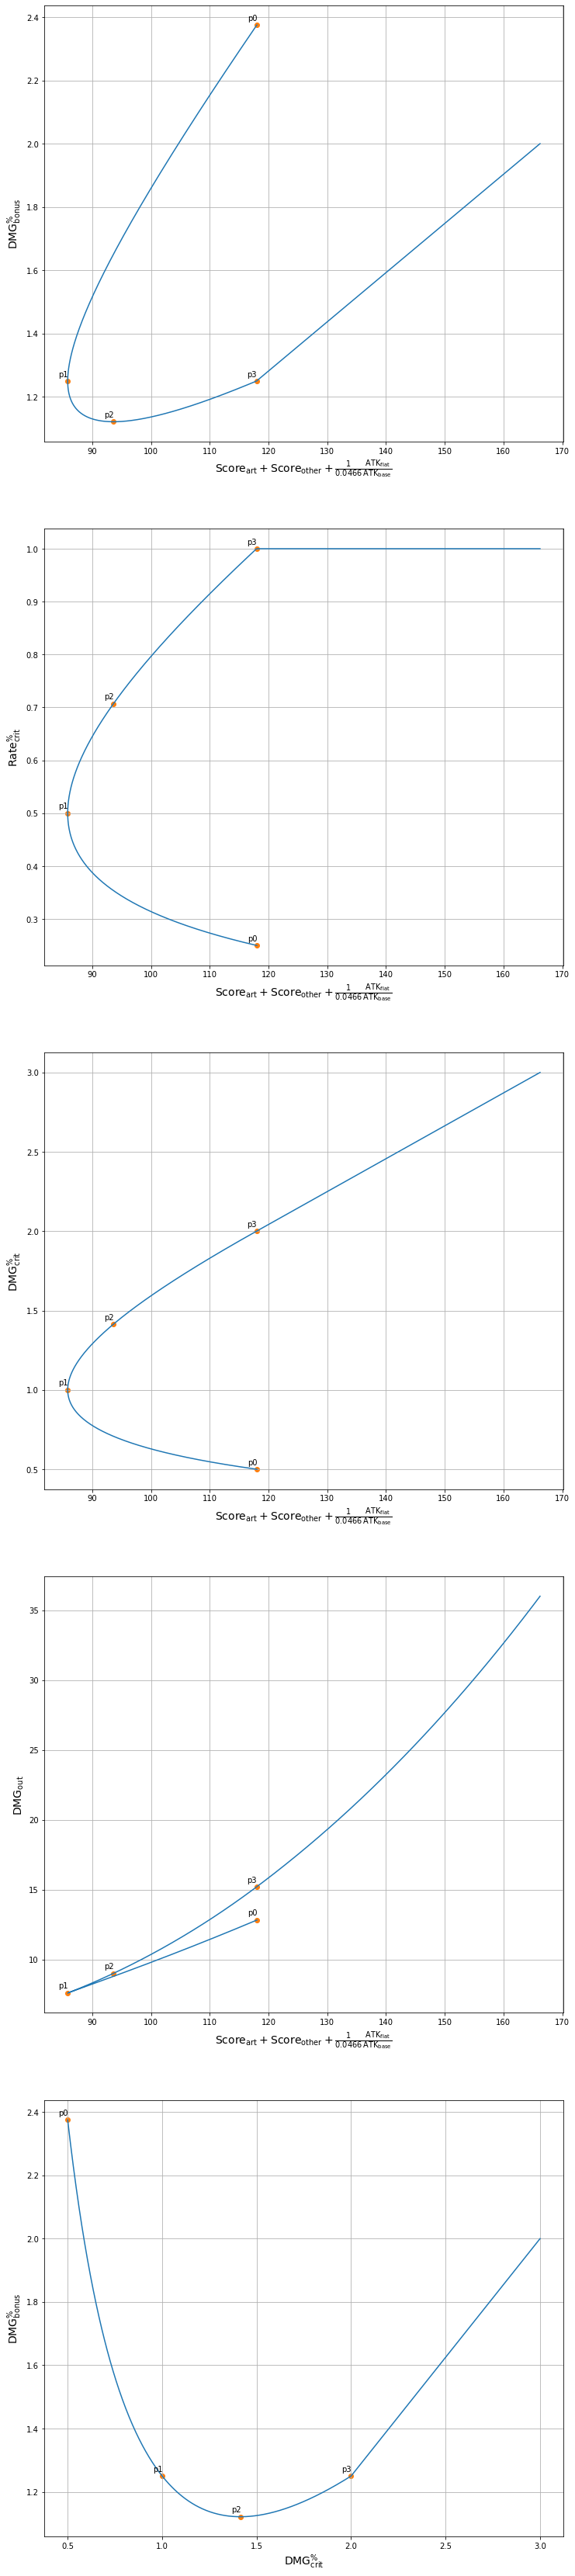

In [1]:
import numpy as np
from matplotlib import pyplot

def from_dmg_crit(dmg_crit):
    rate_crit = np.minimum(dmg_crit/2, 1.0)
    dmg_bonus = (3/4) * (dmg_crit + 1/rate_crit) - 1
    dmg_out = (1 + dmg_bonus)**2 * (1 + rate_crit * dmg_crit)
    score = 2*dmg_bonus/0.0466 + rate_crit/0.0311 + dmg_crit/0.0622
    return (rate_crit, dmg_bonus, dmg_out, score)

l_dmg_crit = np.linspace(0.5, 3.0, 1000)
l_rate_crit, l_dmg_bonus, l_dmg_out, l_score = from_dmg_crit(l_dmg_crit)

p_dmg_crit = np.array([0.5, 1.0, np.sqrt(2), 2.0])
p_rate_crit, p_dmg_bonus, p_dmg_out, p_score = from_dmg_crit(p_dmg_crit)

dmg_crit = {'label': r'$\mathrm{DMG_{crit}^{\%}}$', 'line_values': l_dmg_crit, 'point_values': p_dmg_crit}
rate_crit = {'label': r'$\mathrm{Rate_{crit}^{\%}}$', 'line_values': l_rate_crit, 'point_values': p_rate_crit}
dmg_bonus = {'label': r'$\mathrm{DMG_{bonus}^{\%}}$', 'line_values': l_dmg_bonus, 'point_values': p_dmg_bonus}
dmg_out = {'label': r'$\mathrm{DMG_{out}}$', 'line_values': l_dmg_out, 'point_values': p_dmg_out}
score = {'label': r'$\mathrm{Score_{art}} + \mathrm{Score_{other}} + \frac{1}{0.0466}\frac{\mathrm{ATK_{flat}}}{\mathrm{ATK_{base}}}$', 'line_values': l_score, 'point_values': p_score}

def plot(ax, x, y):
    ax.set_xlabel(x['label'], fontsize=14)
    ax.set_ylabel(y['label'], fontsize=14)
    ax.plot(x['line_values'], y['line_values'], color='C0')
    ax.scatter(x['point_values'], y['point_values'], color='C1')
    for i in range(4):
        ax.annotate('p{}'.format(i), (x['point_values'][i], y['point_values'][i]), xytext=(-12.0, 6.0), textcoords='offset pixels')
    ax.grid()

fig, axs = pyplot.subplots(5, figsize=(12, 60))

plot(axs[0], score, dmg_bonus)
plot(axs[1], score, rate_crit)
plot(axs[2], score, dmg_crit)
plot(axs[3], score, dmg_out)
plot(axs[4], dmg_crit, dmg_bonus)

for i in range(4):
    print('[p{}]'.format(i))
    print('dmg_crit =', dmg_crit['point_values'][i])
    print('rate_crit =', rate_crit['point_values'][i])
    print('dmg_bonus =', dmg_bonus['point_values'][i])
    print('dmg_out =', dmg_out['point_values'][i])
    print('score =', score['point_values'][i])
    print()